In [2]:
import pandas as pd
import seaborn as sns

# Hardcoded data
data = {
    'Model/Metric': ['Deeplabv3+ RGB pre-trained', 'Deeplabv3+ RGB reinitialized', 'Deeplabv3+ RGNIR pre-trained',
                     'Deeplabv3+ RGNIR reinitialized', 'Deeplabv3+ RGNDVI pre-trained', 'Deeplabv3+ RGNDVI reinitialized',
                     'MSNet RGBNIR', 'U-Net RGB', 'U-Net RGBNIR', 'U-Net RGNIR', 'U-Net RGNDVI'],
    'Accuracy': [0.9033, 0.8539, 0.9025, 0.8541, 0.9035, 0.8344, 0.9164, 0.8928, 0.8933, 0.8935, 0.8979],
    'Precision': [0.8038, 0.7425, 0.7814, 0.7505, 0.789, 0.7543, 0.8196, 0.7648, 0.7647, 0.762, 0.7644],
    'Recall': [0.8501, 0.7039, 0.8878, 0.6903, 0.8782, 0.5752, 0.8859, 0.8717, 0.8746, 0.8819, 0.9002],
    'F1': [0.8263, 0.7227, 0.8312, 0.7191, 0.8312, 0.6527, 0.8515, 0.8148, 0.816, 0.8176, 0.8268],
    'IoU': [0.704, 0.5658, 0.7112, 0.5614, 0.7112, 0.4845, 0.7414, 0.6874, 0.6982, 0.6914, 0.7047]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Adding a new column for model names
df['Model'] = df['Model/Metric'].apply(lambda x: ' '.join(x.split()[1:]))

# Adding a new column for model type
df['Model Type'] = df['Model/Metric'].apply(lambda x: x.split()[0])

df['Bands'] = df['Model'].apply(lambda x: x.split()[0])
df['Regime'] = df['Model/Metric'].apply(lambda x: False if "reinitialized" in x else True)

# Displaying the DataFrame
df


,Model/Metric,Accuracy,Precision,Recall,F1,IoU,Model,Model Type,Bands,Regime
0,Deeplabv3+ RGB pre-trained,0.9033,0.8038,0.8501,0.8263,0.7040,RGB pre-trained,Deeplabv3+,RGB,True
1,Deeplabv3+ RGB reinitialized,0.8539,0.7425,0.7039,0.7227,0.5658,RGB reinitialized,Deeplabv3+,RGB,False
2,Deeplabv3+ RGNIR pre-trained,0.9025,0.7814,0.8878,0.8312,0.7112,RGNIR pre-trained,Deeplabv3+,RGNIR,True
3,Deeplabv3+ RGNIR reinitialized,0.8541,0.7505,0.6903,0.7191,0.5614,RGNIR reinitialized,Deeplabv3+,RGNIR,False
4,Deeplabv3+ RGNDVI pre-trained,0.9035,0.7890,0.8782,0.8312,0.7112,RGNDVI pre-trained,Deeplabv3+,RGNDVI,True
5,Deeplabv3+ RGNDVI reinitialized,0.8344,0.7543,0.5752,0.6527,0.4845,RGNDVI reinitialized,Deeplabv3+,RGNDVI,False
6,MSNet RGBNIR,0.9164,0.8196,0.8859,0.8515,0.7414,RGBNIR,MSNet,RGBNIR,True
7,U-Net RGB,0.8928,0.7648,0.8717,0.8148,0.6874,RGB,U-Net,RGB,True
8,U-Net RGBNIR,0.8933,0.7647,0.8746,0.8160,0.6982,RGBNIR,U-Net,RGBNIR,True
9,U-Net RGNIR,0.8935,0.7620,0.8819,0.8176,0.6914,RGNIR,U-Net,RGNIR,True


<Axes: xlabel='Bands', ylabel='F1'>

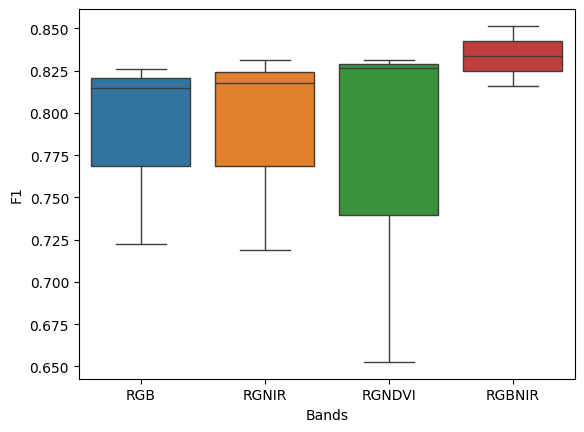

In [3]:
import seaborn as sns

sns.boxplot(data=df, y="F1", x="Bands", hue="Bands")

<Axes: xlabel='Model Type', ylabel='F1'>

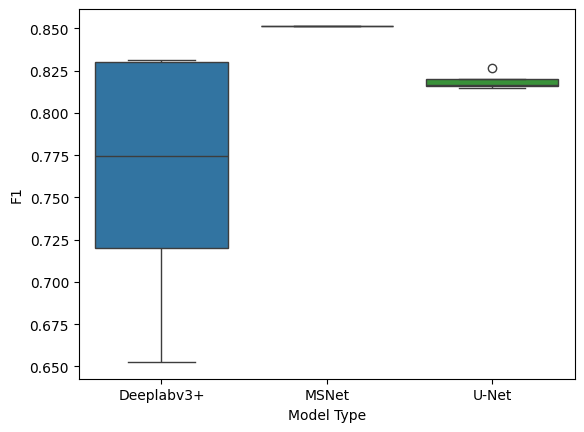

In [4]:
import seaborn as sns

sns.boxplot(data=df, y="F1", x="Model Type", hue="Model Type")

<Axes: xlabel='Bands', ylabel='F1'>

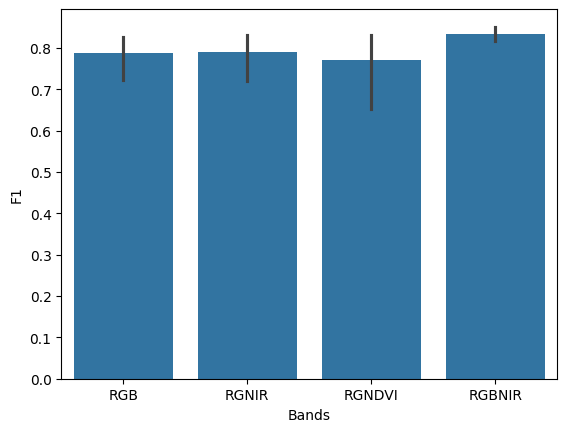

In [5]:
sns.barplot(data=df, y="F1", x="Bands")

In [6]:
df.melt()

,variable,value
0,Model/Metric,Deeplabv3+ RGB pre-trained
1,Model/Metric,Deeplabv3+ RGB reinitialized
2,Model/Metric,Deeplabv3+ RGNIR pre-trained
3,Model/Metric,Deeplabv3+ RGNIR reinitialized
4,Model/Metric,Deeplabv3+ RGNDVI pre-trained
...,...,...
105,Regime,True
106,Regime,True
107,Regime,True
108,Regime,True


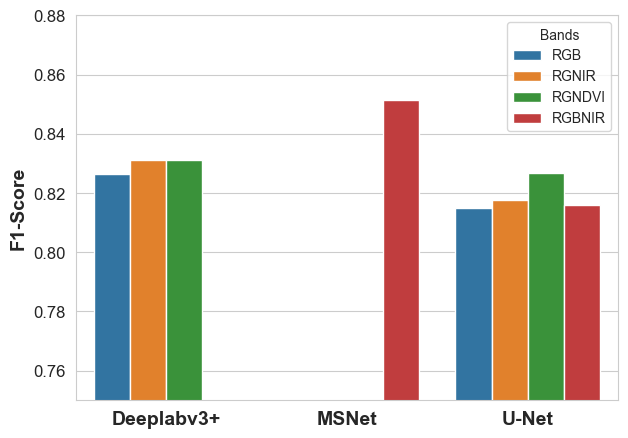

In [19]:
df_subset = df[df.Regime]


import matplotlib.pyplot as plt
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.barplot(data=df_subset, y="F1", x="Model Type", hue="Bands", dodge=True, ax=ax)
ax.set(ylim=(0.75, 0.88))
ax.set_xlabel(None)


ax.set_ylabel("F1-Score", fontsize=14, fontweight="bold")
ax.tick_params(axis='both', which='major', labelsize=12)

labels = ax.get_xticklabels()
[label.set_fontweight('bold') for label in labels]
[label.set_fontsize(14) for label in labels]

plt.savefig("barchart.pdf", dpi=600, bbox_inches="tight")


[(0.85, 0.96222)]

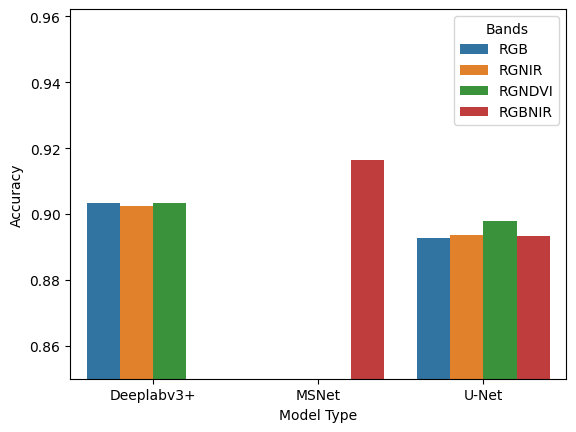

In [23]:
g = sns.barplot(data=df_subset, y="Accuracy", x="Model Type", hue="Bands")
g.set(ylim=(0.85, None))